### ***PART A: Problem Definition, EDA & Data Pre-processing***

**Problem Definition:** The goal is to develop a Financial Health Assessment Tool that predicts whether a company will be tagged as a defaulter based on its Net worth Next Year using historical financial data. The prediction will be made by leveraging machine learning techniques, and a company will be classified as a defaulter if its Net worth Next Year is negative.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data from the CSV file
file_path = '/content/drive/MyDrive/FRA Module/Project/Company FRA.csv'
Company = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Display the first few rows of the dataframe
Company.head(2)

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN


In [ ]:
Company.columns

Index(['Num', 'Networth Next Year', 'Total assets', 'Net worth',
       'Total income', 'Change in stock', 'Total expenses', 'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth', 'Sales',
       'Income from fincial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to current liabilities (times)',
       'Cash to average c

In [ ]:
#Remaning Column for ease of understanding
Company.columns = Company.columns.str.replace(' ', '_').str.replace('&', 'and').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', 'to')

In [ ]:
# Clean column names by replacing special characters

# Verify the changes
print(Company.columns)

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Sales', 'Income_from_fincial_services', 'Other_income',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_and_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOLtoTNW', 'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times',
       'Cash

In [ ]:
Company.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


**Checking Shape, Data Types, and Statistical Summary**

---



In [ ]:
# Check the shape of the data
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


In [ ]:
# Check data types
Company.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Num                                           4256 non-null   int64  
 1   Networth_Next_Year                            4256 non-null   float64
 2   Total_assets                                  4256 non-null   float64
 3   Net_worth                                     4256 non-null   float64
 4   Total_income                                  4025 non-null   float64
 5   Change_in_stock                               3706 non-null   float64
 6   Total_expenses                                4091 non-null   float64
 7   Profit_after_tax                              4102 non-null   float64
 8   PBDITA                                        4102 non-null   float64
 9   PBT                                           4102 non-null   f

***Insights :***

---


The dataset contains missing values across multiple columns, including *Total_income*, *Change_in_stock*, *Other_income*, *Deferred_tax_liability*, and *PE_on_BSE*, which have significant gaps. These missing values will need to be addressed for accurate analysis. In terms of data types, most columns are represented as float64, indicating numerical data, while the *Num* column is of type int64, serving as an identifier. The consistent use of numerical data types suggests the dataset is well-suited for quantitative analysis once the missing values are handled.

In [ ]:
# Statistical summary
pd.options.display.float_format = '{:.2f}'.format
Company.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,4256.00,4256.00,4256.00,4256.00,4025.00,3706.00,4091.00,4102.00,4102.00,4102.00,...,3871.00,3382.00,3492.00,3828.00,3446.00,3446.00,4256.00,4256.00,4256.00,1629.00
mean,2128.50,1344.74,3573.62,1351.95,4688.19,43.70,4356.30,295.05,605.94,410.26,...,17.93,84.37,28.68,17.73,23764909.56,-1094.83,-196.22,-197.53,3573.62,55.46
std,1228.75,15936.74,30074.44,12961.31,53918.95,436.92,51398.09,3079.90,5646.23,4217.42,...,90.16,562.64,169.65,343.13,170979041.33,34101.36,13061.95,13061.93,30074.44,1304.45
min,1.00,-74265.60,0.10,0.00,0.00,-3029.40,-0.10,-3908.30,-440.70,-3894.80,...,0.00,-0.09,-0.18,-2.00,-2147483647.00,-999998.90,-843181.82,-843181.82,0.10,-1116.64
25%,1064.75,3.98,91.30,31.48,107.10,-1.80,96.80,0.50,6.93,0.80,...,3.81,8.19,5.10,3.02,1308382.50,10.00,0.00,0.00,91.30,2.97
50%,2128.50,72.10,315.50,104.80,455.10,1.60,426.80,9.00,36.90,12.60,...,6.47,17.32,9.86,6.41,4750000.00,10.00,1.49,1.24,315.50,8.69
75%,3192.25,330.82,1120.80,389.85,1485.00,18.40,1395.70,53.30,158.70,74.17,...,11.85,40.01,20.24,11.82,10906020.00,10.00,10.00,7.62,1120.80,17.00
max,4256.00,805773.40,1176509.20,613151.60,2442828.20,14185.50,2366035.30,119439.10,208576.50,145292.60,...,3135.20,17947.60,5651.40,21092.00,4130400545.00,100000.00,34522.53,34522.53,1176509.20,51002.74


Based on the descriptive statistics, below are specific insights:

1. **Net Worth Distribution:**
   - **Mean Net Worth Next Year:** \$2,128.50 (suggests a positive net worth projection overall).
   - **High Variability:** Net worth ranges from a minimum of \$1 to a maximum of \$4,256, indicating diverse financial conditions across companies.

2. **Assets and Income:**
   - **Total Assets:** Mean is \$1,344.74, with a maximum of \$805,773.40. Significant differences in asset sizes may indicate varying scales of operations.
   - **Total Income:** Mean income is \$1,351.95 with a high standard deviation, suggesting some companies have exceptionally high or low income.

3. **Profitability Ratios:**
   - **Profit After Tax:** Average is \$295.05, but with high variability, indicating that some companies are significantly more profitable.
   - **PBDITA as % of Total Income:** Mean is 4.36%, showing variability in how much profit before depreciation, tax, and amortization contributes to total income.

4. **Debt and Liabilities:**
   - **Debt-to-Equity Ratio:** Companies show a wide range of leverage, with mean values indicating some companies are highly leveraged.
   - **TOL/TNW Ratio:** The mean is around 2.38, suggesting moderate levels of total liabilities compared to net worth.

5. **Liquidity Ratios:**
   - **Current Ratio:** Mean is 1.53, indicating that, on average, companies have more current assets than current liabilities, though some may be under significant liquidity pressure.
   - **Quick Ratio:** Average of 0.77 suggests that some companies may have liquidity issues, as the quick ratio is below 1.

6. **Turnover Ratios:**
   - **Debtors Turnover:** Mean of 17.93 suggests companies are relatively efficient in collecting receivables, but high variance indicates some companies may struggle in this area.

7. **Market Indicators:**
   - **EPS:** Mean is -1094.83, indicating that many companies may be experiencing losses or negative earnings.

8. **Contingent Liabilities:**
   - **Mean Contingent Liabilities:** High contingent liabilities relative to net worth may indicate potential future financial risks.

These insights reveal a broad range of financial health among companies, highlighting areas for potential improvement, risk assessment, and strategic planning.

In [ ]:
Company.duplicated().sum()

0

**Creating a binary target variable using 'Networth_Next_Year'**

---



In [ ]:
#Creating a binary target variable using 'Networth_Next_Year'
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [ ]:
#Checking proportion of default
Company['default'].value_counts(normalize = True)

,proportion
default,
0,0.79
1,0.21


**Insights :**

---


The dependent variable "default" in your dataset has the following proportions:

Class 0 (Non-default): 79%
Class 1 (Default): 21%
This indicates an imbalance, with the majority of the observations (79%) not defaulting and only 21% representing default cases.

**Dropping Irrelevant Variables**

---



In [ ]:
Company = Company.drop(['Num', 'Networth_Next_Year', 'Equity_face_value'], axis = 1)

**Multivariate Analysis**

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Calculate the correlation matrix
correlation_matrix = Company.corr()

# Create an interactive widget for zooming
def plot_correlation_matrix(size):
    plt.figure(figsize=(size, size))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# Create an interactive slider to control the size of the heatmap
widgets.interact(plot_correlation_matrix, size=widgets.FloatSlider(min=8, max=20, step=1, value=12))


interactive(children=(FloatSlider(value=12.0, description='size', max=20.0, min=8.0, step=1.0), Output()), _do…

<function __main__.plot_correlation_matrix(size)>

**Insights:**

---


The correlation matrix heatmap displays the relationships between multiple financial variables, allowing us to assess which variables are highly correlated (positively or negatively) with each other.

**1. Highly Positively Correlated Variables:**
* Total_assets & Net_worth (0.93): This indicates that as total assets increase, net worth tends to increase significantly, which is expected as assets are a major component of net worth.
Total_income & Total_expenses (0.97): This strong positive correlation suggests that as a company’s income increases, its expenses also rise, possibly due to variable costs scaling with revenue.
* PBDITA & Total_income (0.94): Profit Before Depreciation, Interest, Tax, and Amortization (PBDITA) is closely tied to income, implying that revenue growth significantly impacts this profitability measure.
Capital_employed & Net_fixed_assets (0.99): The nearly perfect correlation suggests that fixed assets are a primary component of capital employed in the business.

**2. Highly Negatively Correlated Variables:**
* Cash_to_current_liabilities_times & Total_liabilities (around -0.60): A strong negative correlation shows that companies with higher liabilities tend to have lower cash ratios, indicating potential liquidity issues.
* Debt_to_equity_ratio_times & Net_worth (around -0.48): This suggests that higher leverage (debt) is typically associated with lower equity, impacting the company’s financial structure and risk.

**3.  Clusters of Interrelated Variables:**
* Profitability Metrics (PBDITA, PBT, PAT, Cash Profit):
These metrics show high positive correlations among themselves, indicating that a rise in one often signals an increase in others. For example, PBDITA_as_perc_of_total_income & PBT_as_perc_of_total_income (0.91) shows that operating profitability translates directly into pre-tax profitability.
*Liquidity Measures (Current_ratio, Quick_ratio, Cash ratios):
The correlations between different liquidity ratios suggest a close relationship, such as Current_ratio_times & Cash_to_current_liabilities_times (0.80), indicating that companies with better current ratios also tend to have better cash positions relative to liabilities.

**Removing Reduntant variables**

---

Here are potential redundancies in your dataset:

1. **Net worth and Net worth Next Year**: Since we are already using Net worth Next Year as a dependent variable, keeping both could introduce multicollinearity.

2. **Net worth = Total assets - Total liabilities:** Net worth can be computed using Total assets and Total liabilities making Net worth redundant unless it’s part of the analysis directly. Also, total assets and total liabilities are highly correlated with majority of the variables, we can remove them to avoid multicollinearity.

3. PBDITA, **PBDITA** as % of total income, **PBT**, and PBT as % of total income, **Cash Profit** as % of total income: Since dataset has percentage variables, the absolute values of PBDITA and PBT might be redundant.

4. **PAT**, PAT as % of total income, and PAT as % of net worth: These percentages could make one of the variables redundant if both percentage and absolute terms are included in the model.

5. **Current ratio and Quick ratio:** These ratios measure similar things, with the Quick ratio excluding inventory. If inventory is less relevant, choose one of these.
6. **Shares outstanding, Equity face value, and EPS/Adjusted EPS:** Depending on how equity is used in your model, having both Shares outstanding and EPS could be redundant. You may only need EPS or Adjusted EPS as they already account for equity and shares.
7. **Total_income and Sales** are highly correlated because sales directly contribute to total income, reflecting a common financial relationship. To avoid redundancy and potential multicollinearity in models, we can drop the less critical variable.
8. **Reserves and Funds, Shareholders' Funds, and Cumulative Retained Profits** represent different parts of the company's retained earnings or equity. Shareholders' Funds include both Reserves and Cumulative Retained Profits. Since these metrics overlap in representing a company's retained earnings, they can be removed to avoid multicollinearity.

In [ ]:
import pandas as pd

# Assuming 'Company' is your DataFrame
columns_to_remove = ['Net_worth', 'Total_assets', 'Total_liabilities', 'PBT', 'PBDITA','Profit_after_tax',
    'Current_ratio_times', 'Adjusted_EPS', 'Shares_outstanding','Total_income','Cash_profit','Cumulative_retained_profits','Reserves_and_funds']

# Drop the specified columns
Company= Company.drop(columns=columns_to_remove)




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Calculate the correlation matrix
correlation_matrix = Company.corr()

# Create an interactive widget for zooming
def plot_correlation_matrix(size):
    plt.figure(figsize=(size, size))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# Create an interactive slider to control the size of the heatmap
widgets.interact(plot_correlation_matrix, size=widgets.FloatSlider(min=8, max=20, step=1, value=12))


interactive(children=(FloatSlider(value=12.0, description='size', max=20.0, min=8.0, step=1.0), Output()), _do…

<function __main__.plot_correlation_matrix(size)>

### ***PART A: Data Pre-processing***

**Null values detection & Treatment**

---



In [ ]:
Company.isnull().sum()

,0
Change_in_stock,550
Total_expenses,165
PBDITA_as_perc_of_total_income,79
PBT_as_perc_of_total_income,79
PAT_as_perc_of_total_income,79
Cash_profit_as_perc_of_total_income,79
PAT_as_perc_of_net_worth,0
Sales,305
Income_from_fincial_services,1111
Other_income,1556


In [ ]:
#Splitting independent and dependent variable
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

**Oulier Detection & Treatment**

---



In [ ]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [ ]:
((Company_X > UL) | (Company_X < LL)).sum()

,0
Change_in_stock,750
Total_expenses,518
PBDITA_as_perc_of_total_income,346
PBT_as_perc_of_total_income,546
PAT_as_perc_of_total_income,610
Cash_profit_as_perc_of_total_income,426
PAT_as_perc_of_net_worth,427
Sales,500
Income_from_fincial_services,517
Other_income,389


In [ ]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [ ]:
Company_X.shape

(4256, 35)

In [ ]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

**Missing Value Treatment : Visually inspect the missing values in our data**


---





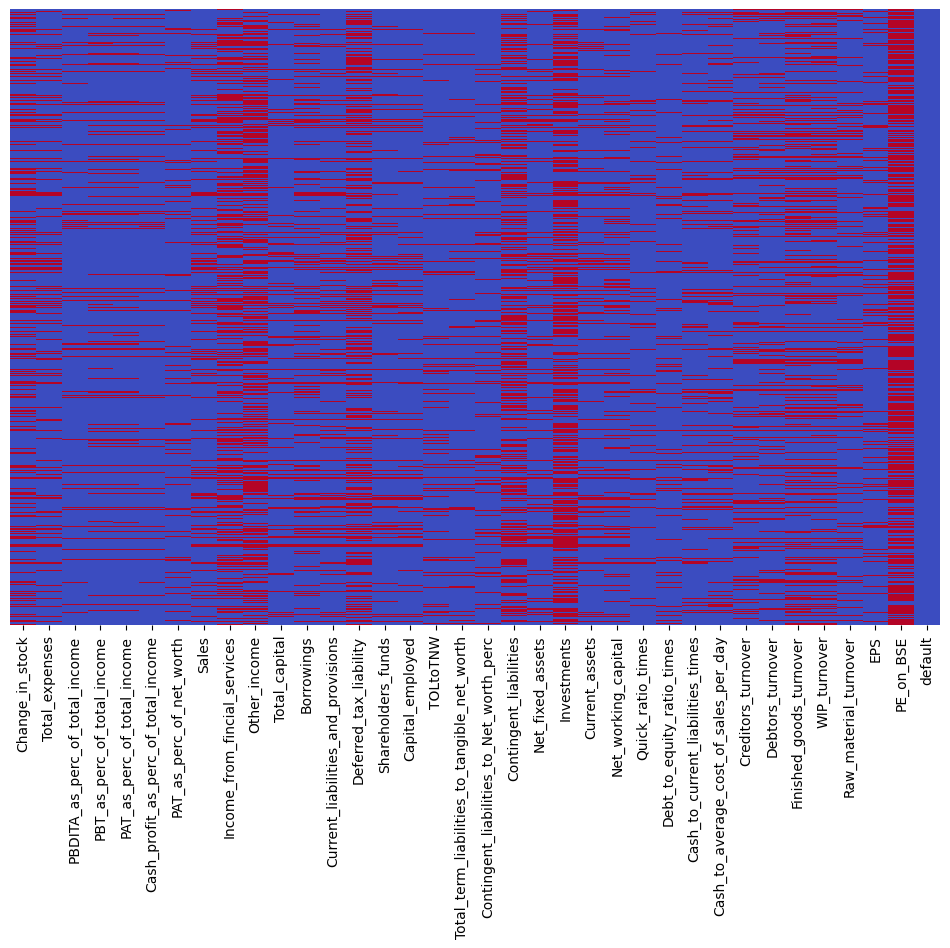

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

**Insights:**

---


**Data Gaps in Key Financial Areas:** The missing values in sales, expenses, and liquidity measures suggest significant data gaps that can affect overall financial health analysis, particularly when assessing profitability, liquidity, and capital structure.

**Impact on Risk Analysis:** Missing data in turnover and leverage-related ratios can undermine risk assessments, especially for companies where liquidity management and debt levels are critical factors.

**Potential Bias in Financial Metrics:** Missing values in profitability percentages (like PBDITA and PBT) may lead to biased performance evaluations, especially in comparative analysis across firms or over time.

Effective imputation of missing data is crucial to ensure the reliability of financial insights and decision-making, especially in variables critical to understanding operational efficiency, liquidity status, and financial risk profiles.

**Total missing values by each row.**

---



In [ ]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

,0
PE_on_BSE,0.67
Investments,0.51
Other_income,0.46
Contingent_liabilities,0.42
Deferred_tax_liability,0.42
Income_from_fincial_services,0.38
Change_in_stock,0.31
Finished_goods_turnover,0.30
WIP_turnover,0.27
Borrowings,0.23


**Dropping columns with more than 30% missing values**

---



In [ ]:
Company_sub2 = Company_sub1.drop(['PE_on_BSE',
                                  'Investments',
                                  'Other_income',
                                  'Contingent_liabilities',
                                  'Deferred_tax_liability',
                                  'Income_from_fincial_services'
                                  ,'Finished_goods_turnover'],
                                  axis=1)


In [ ]:
Company_sub2.shape

(4256, 29)

**Segregate the predictors and response**

---



In [ ]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

**Scale the predictors**

---



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [ ]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

**Imputing the remaining missing values**

---



In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=10)

In [ ]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [ ]:
Company_imputed.isnull().sum()

,0
Change_in_stock,0
Total_expenses,0
PBDITA_as_perc_of_total_income,0
PBT_as_perc_of_total_income,0
PAT_as_perc_of_total_income,0
Cash_profit_as_perc_of_total_income,0
PAT_as_perc_of_net_worth,0
Sales,0
Total_capital,0
Borrowings,0


### ***PART A: Model Building & Model Performance Improvement***

***Model Building using Logistic Regression***

---



In [ ]:
import statsmodels.formula.api as SM

In [ ]:
Company_imputed.columns

Index(['Change_in_stock', 'Total_expenses', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Sales', 'Total_capital', 'Borrowings',
       'Current_liabilities_and_provisions', 'Shareholders_funds',
       'Capital_employed', 'TOLtoTNW',
       'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth_perc', 'Net_fixed_assets',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
       'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'WIP_turnover', 'Raw_material_turnover', 'EPS',
       'default'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as SM

# Target variable
target_column = 'default'

# Generate the formula by dynamically including all columns except the target column
# This will exclude the 'default' column from the feature set
independent_columns = Company_imputed.columns.drop(target_column)
formula = target_column + ' ~ ' + ' + '.join(independent_columns)

# Run the logistic regression model
model = SM.logit(formula=formula, data=Company_imputed).fit()

# Print the model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.507571
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 4256
Model:                          Logit   Df Residuals:                     4227
Method:                           MLE   Df Model:                           28
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01848
Time:                        17:43:48   Log-Likelihood:                -2160.2
converged:                       True   LL-Null:                       -2200.9
Covariance Type:            nonrobust   LLR p-value:                 4.209e-07
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Key insights from the logistic regression output:**

---



1. **Model Fit**: The model converged successfully with a log-likelihood value of -2160.2 and a pseudo R-squared of 0.01848, indicating a relatively low explanatory power of the model in predicting default.
  
2. **Significant Variables**:
   - **Total Expenses** (p=0.013, positive coefficient): An increase in total expenses raises the likelihood of default.
   - **Sales** (p=0.034, negative coefficient): Higher sales reduce the probability of default.
   - **Earnings Per Share (EPS)** (p=0.031, negative coefficient): Lower EPS is associated with a higher likelihood of default.
  
3. **Non-Significant Variables**: Many variables, such as borrowing and contingent liabilities, do not show significant effects on default based on their p-values.

***Checking the Variance Inflation Factor***

---



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = Company_imputed.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,Total_expenses,49.66
7,Sales,48.20
12,Capital_employed,12.81
3,PBT_as_perc_of_total_income,12.02
4,PAT_as_perc_of_total_income,10.49
17,Current_assets,9.32
11,Shareholders_funds,7.17
5,Cash_profit_as_perc_of_total_income,6.25
20,Debt_to_equity_ratio_times,5.95
2,PBDITA_as_perc_of_total_income,5.43


**The Variance Inflation Factor (VIF) provides insights into multicollinearity within the model:**

---



- **High Multicollinearity**:
  - **Total expenses (49.66)** and **Sales (48.20)** have extremely high VIF values, indicating a strong degree of multicollinearity. These variables are likely highly correlated with other predictors in the model, which can lead to unstable estimates.
  - **Capital employed (12.81)**, **PBT as % of total income (12.02)**, and **PAT as % of total income (10.49)** also have high VIF values, suggesting potential collinearity concerns.

- **Moderate Multicollinearity**:
  - Variables like **Current assets (9.32)**, **Shareholders' funds (7.17)**, and **Cash profit as % of total income (6.25)** show moderate multicollinearity.

- **Low Multicollinearity**:
  - Variables such as **Change in stock (1.15)**, **WIP turnover (1.28)**, and **Contingent liabilities to net worth % (1.30)** have low VIF values, indicating minimal multicollinearity issues.

We may consider removing variables with high VIF values to reduce multicollinearity and improve the model's stability.

In [ ]:
# Droping columns from the dataframe
X = X.drop('Total_expenses', axis=1)

# Calculate VIF and sort values by VIF in descending order
calc_vif(X).sort_values(by='VIF', ascending=False)

,variables,VIF
11,Capital_employed,12.79
2,PBT_as_perc_of_total_income,12.01
3,PAT_as_perc_of_total_income,10.48
16,Current_assets,9.19
10,Shareholders_funds,7.16
4,Cash_profit_as_perc_of_total_income,6.24
19,Debt_to_equity_ratio_times,5.94
6,Sales,5.70
1,PBDITA_as_perc_of_total_income,5.43
9,Current_liabilities_and_provisions,5.17


In [ ]:
# Droping columns from the dataframe
X = X.drop('Capital_employed', axis=1)

# Calculate VIF and sort values by VIF in descending order
calc_vif(X).sort_values(by='VIF', ascending=False)


,variables,VIF
2,PBT_as_perc_of_total_income,12.01
3,PAT_as_perc_of_total_income,10.48
15,Current_assets,8.78
4,Cash_profit_as_perc_of_total_income,6.22
18,Debt_to_equity_ratio_times,5.93
6,Sales,5.70
1,PBDITA_as_perc_of_total_income,5.42
9,Current_liabilities_and_provisions,5.17
10,Shareholders_funds,4.79
11,TOLtoTNW,4.20


In [ ]:
# Droping columns from the dataframe
X = X.drop('PBT_as_perc_of_total_income', axis=1)

# Calculate VIF and sort values by VIF in descending order
calc_vif(X).sort_values(by='VIF', ascending=False)


,variables,VIF
14,Current_assets,8.78
3,Cash_profit_as_perc_of_total_income,6.11
17,Debt_to_equity_ratio_times,5.90
5,Sales,5.68
1,PBDITA_as_perc_of_total_income,5.27
8,Current_liabilities_and_provisions,5.16
9,Shareholders_funds,4.79
10,TOLtoTNW,4.20
2,PAT_as_perc_of_total_income,4.18
7,Borrowings,4.10


In [ ]:
# Droping columns from the dataframe
X = X.drop('Current_assets', axis=1)

# Calculate VIF and sort values by VIF in descending order
calc_vif(X).sort_values(by='VIF', ascending=False)

,variables,VIF
3,Cash_profit_as_perc_of_total_income,6.08
16,Debt_to_equity_ratio_times,5.89
1,PBDITA_as_perc_of_total_income,5.23
5,Sales,4.90
9,Shareholders_funds,4.30
2,PAT_as_perc_of_total_income,4.18
10,TOLtoTNW,4.17
8,Current_liabilities_and_provisions,4.13
13,Net_fixed_assets,3.97
7,Borrowings,3.68


In [ ]:
# Droping columns from the dataframe
X = X.drop(['Cash_profit_as_perc_of_total_income'], axis=1)

# Calculate VIF and sort values by VIF in descending order
calc_vif(X).sort_values(by='VIF', ascending=False)

,variables,VIF
15,Debt_to_equity_ratio_times,5.88
4,Sales,4.89
8,Shareholders_funds,4.29
9,TOLtoTNW,4.16
7,Current_liabilities_and_provisions,4.11
12,Net_fixed_assets,3.94
6,Borrowings,3.67
2,PAT_as_perc_of_total_income,3.66
10,Total_term_liabilities_to_tangible_net_worth,3.40
1,PBDITA_as_perc_of_total_income,2.74


In [ ]:
# Droping columns from the dataframe
X = X.drop(['Debt_to_equity_ratio_times'], axis=1)

# Calculate VIF and sort values by VIF in descending order
calc_vif(X).sort_values(by='VIF', ascending=False)

,variables,VIF
4,Sales,4.89
8,Shareholders_funds,4.29
7,Current_liabilities_and_provisions,4.04
12,Net_fixed_assets,3.93
2,PAT_as_perc_of_total_income,3.66
6,Borrowings,3.57
1,PBDITA_as_perc_of_total_income,2.74
9,TOLtoTNW,2.61
15,Cash_to_current_liabilities_times,2.49
10,Total_term_liabilities_to_tangible_net_worth,2.38


In [ ]:
# Droping columns from the dataframe
X = X.drop(['Sales'], axis=1)

# Calculate VIF and sort values by VIF in descending order
calc_vif(X).sort_values(by='VIF', ascending=False)

,variables,VIF
7,Shareholders_funds,4.09
11,Net_fixed_assets,3.90
2,PAT_as_perc_of_total_income,3.66
5,Borrowings,3.42
6,Current_liabilities_and_provisions,3.12
1,PBDITA_as_perc_of_total_income,2.66
8,TOLtoTNW,2.61
14,Cash_to_current_liabilities_times,2.47
9,Total_term_liabilities_to_tangible_net_worth,2.37
15,Cash_to_average_cost_of_sales_per_day,2.29


In [ ]:
X = X.drop(['Shareholders_funds'], axis=1)

# Calculate VIF and sort values by VIF in descending order
calc_vif(X).sort_values(by='VIF', ascending=False)

,variables,VIF
2,PAT_as_perc_of_total_income,3.63
10,Net_fixed_assets,3.52
5,Borrowings,3.37
1,PBDITA_as_perc_of_total_income,2.66
6,Current_liabilities_and_provisions,2.54
7,TOLtoTNW,2.51
13,Cash_to_current_liabilities_times,2.47
8,Total_term_liabilities_to_tangible_net_worth,2.36
14,Cash_to_average_cost_of_sales_per_day,2.29
3,PAT_as_perc_of_net_worth,2.22


In [ ]:
# Droping columns from the dataframe
X = X.drop(['PAT_as_perc_of_total_income'], axis=1)

# Calculate VIF and sort values by VIF in descending order
calc_vif(X).sort_values(by='VIF', ascending=False)

,variables,VIF
9,Net_fixed_assets,3.52
4,Borrowings,3.35
5,Current_liabilities_and_provisions,2.54
6,TOLtoTNW,2.49
12,Cash_to_current_liabilities_times,2.46
7,Total_term_liabilities_to_tangible_net_worth,2.34
13,Cash_to_average_cost_of_sales_per_day,2.29
2,PAT_as_perc_of_net_worth,1.78
18,EPS,1.67
11,Quick_ratio_times,1.65


In [ ]:
# Droping columns from the dataframe
X = X.drop(['Net_fixed_assets'], axis=1)

# Calculate VIF and sort values by VIF in descending order
calc_vif(X).sort_values(by='VIF', ascending=False)

,variables,VIF
11,Cash_to_current_liabilities_times,2.46
4,Borrowings,2.42
6,TOLtoTNW,2.41
7,Total_term_liabilities_to_tangible_net_worth,2.31
12,Cash_to_average_cost_of_sales_per_day,2.28
5,Current_liabilities_and_provisions,2.25
2,PAT_as_perc_of_net_worth,1.77
17,EPS,1.66
10,Quick_ratio_times,1.65
3,Total_capital,1.60


**Summary post reducing Multicollinarity. **

---
- **Dropping Variables Sequentially**: Variables with high VIF were dropped one by one, which is crucial to observe how other variables' VIFs react during each drop. This approach helps ensure that dropping a single variable does not inadvertently affect the VIF of other variables.

- **Reduced Multicollinearity**: By sequentially dropping variables with high Variance Inflation Factor (VIF) values, we've effectively reduced multicollinearity. The VIF values for the remaining variables are now significantly lower, with the highest being 2.46, indicating reduced multicollinearity.

- **Variables with Low VIF**: The remaining variables have VIF values well below the threshold of 3, suggesting they are less likely to cause multicollinearity issues. For instance, **Change in stock (1.13)** and **WIP turnover (1.23)** have very low VIFs.




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = Company_imputed['default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [ ]:
Company_train = pd.concat([X_train, y_train], axis = 1)
Company_test = pd.concat([X_test, y_test], axis = 1)

In [ ]:
X.columns

Index(['Change_in_stock', 'PBDITA_as_perc_of_total_income',
       'PAT_as_perc_of_net_worth', 'Total_capital', 'Borrowings',
       'Current_liabilities_and_provisions', 'TOLtoTNW',
       'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth_perc', 'Net_working_capital',
       'Quick_ratio_times', 'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'WIP_turnover', 'Raw_material_turnover', 'EPS'],
      dtype='object')

**Model 2 : logistic regression model**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ Change_in_stock + PBDITA_as_perc_of_total_income + '
           'PAT_as_perc_of_net_worth + Total_capital + Borrowings + '
           'Current_liabilities_and_provisions + TOLtoTNW + '
           'Total_term_liabilities_to_tangible_net_worth + '
           'Contingent_liabilities_to_Net_worth_perc + Net_working_capital + '
           'Quick_ratio_times + Cash_to_current_liabilities_times + '
           'Cash_to_average_cost_of_sales_per_day + Creditors_turnover + '
           'Debtors_turnover + WIP_turnover + Raw_material_turnover + EPS')

# Fit the logistic regression model
model_2 = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_2.summary())


Optimization terminated successfully.
         Current function value: 0.509410
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2960
Method:                           MLE   Df Model:                           18
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01175
Time:                        17:43:53   Log-Likelihood:                -1517.5
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                  0.006852
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Summary of the updated logistic regression model results:**

---



- **Model Overview**: The logistic regression model, with 2979 observations and 18 variables, achieved a current function value of 0.509410 after 5 iterations. The model converged successfully.

- **Pseudo R-squared**: The Pseudo R-squared value is 0.01175, indicating a modest fit of the model to the data.

- **Significant Variables**:
  - **PBDITA_as_perc_of_total_income**: Coefficient of -0.1541, significant with a p-value of 0.009, suggesting a negative impact on the likelihood of default.
  - **Total_capital**: Coefficient of 0.0992, marginally significant with a p-value of 0.080, implying a potential positive association with default.

- **Non-significant Variables**: Most other variables, including **Change_in_stock**, **PAT_as_perc_of_net_worth**, and **EPS**, are not significant with p-values greater than 0.05.

- **Next Steps**: Further refinement of the model by possibly re-evaluating the significance of remaining variables or exploring alternative modeling techniques. The low Pseudo R-squared indicates that the model may not explain a large proportion of the variance in the dependent variable.

**Model 3 : Removing insinificant variable(TOLtoTNW)**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ Change_in_stock + PBDITA_as_perc_of_total_income + '
           'PAT_as_perc_of_net_worth + Total_capital + Borrowings + '
           'Current_liabilities_and_provisions +'
           'Total_term_liabilities_to_tangible_net_worth + '
           'Contingent_liabilities_to_Net_worth_perc + Net_working_capital + '
           'Quick_ratio_times + Cash_to_current_liabilities_times + '
           'Cash_to_average_cost_of_sales_per_day + Creditors_turnover + '
           'Debtors_turnover + WIP_turnover + Raw_material_turnover + EPS')

# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.509412
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2961
Method:                           MLE   Df Model:                           17
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01175
Time:                        17:43:53   Log-Likelihood:                -1517.5
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                  0.004463
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Model 4 : Removing insinificant variable (Change_in_stock)**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ PBDITA_as_perc_of_total_income + '
           'PAT_as_perc_of_net_worth + Total_capital + Borrowings + '
           'Current_liabilities_and_provisions +'
           'Total_term_liabilities_to_tangible_net_worth + '
           'Contingent_liabilities_to_Net_worth_perc + Net_working_capital + '
           'Quick_ratio_times + Cash_to_current_liabilities_times + '
           'Cash_to_average_cost_of_sales_per_day + Creditors_turnover + '
           'Debtors_turnover + WIP_turnover + Raw_material_turnover + EPS')

# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.509415
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2962
Method:                           MLE   Df Model:                           16
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01175
Time:                        17:43:54   Log-Likelihood:                -1517.5
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                  0.002827
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Model 5 : Removing insinificant variable (WIP_turnover )**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ PBDITA_as_perc_of_total_income + '
           'PAT_as_perc_of_net_worth + Total_capital + Borrowings + '
           'Current_liabilities_and_provisions +'
           'Total_term_liabilities_to_tangible_net_worth + '
           'Contingent_liabilities_to_Net_worth_perc + Net_working_capital + '
           'Quick_ratio_times + Cash_to_current_liabilities_times + '
           'Cash_to_average_cost_of_sales_per_day + Creditors_turnover + '
           'Debtors_turnover + Raw_material_turnover + EPS')

# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.509426
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2963
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01172
Time:                        17:43:54   Log-Likelihood:                -1517.6
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                  0.001764
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Model 6 : Removing insinificant variable (Quick_ratio_times)**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ PBDITA_as_perc_of_total_income + '
           'PAT_as_perc_of_net_worth + Total_capital + Borrowings + '
           'Current_liabilities_and_provisions +'
           'Total_term_liabilities_to_tangible_net_worth + '
           'Contingent_liabilities_to_Net_worth_perc + Net_working_capital + '
           ' Cash_to_current_liabilities_times + '
           'Cash_to_average_cost_of_sales_per_day + Creditors_turnover + '
           'Debtors_turnover + Raw_material_turnover + EPS')


# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.509447
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2964
Method:                           MLE   Df Model:                           14
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01168
Time:                        17:43:54   Log-Likelihood:                -1517.6
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                  0.001088
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Model 7 : Removing insinificant variable (PAT_as_perc_of_net_worth)**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ PBDITA_as_perc_of_total_income + '
           ' Total_capital + Borrowings + Current_liabilities_and_provisions +'
           'Total_term_liabilities_to_tangible_net_worth + '
           'Contingent_liabilities_to_Net_worth_perc + Net_working_capital + '
           ' Cash_to_current_liabilities_times + '
           'Cash_to_average_cost_of_sales_per_day + Creditors_turnover + '
           'Debtors_turnover + Raw_material_turnover + EPS')

# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.509502
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2965
Method:                           MLE   Df Model:                           13
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01158
Time:                        17:43:54   Log-Likelihood:                -1517.8
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 0.0006951
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Model 8 : Removing insinificant variable (Current_liabilities_and_provisions)**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ PBDITA_as_perc_of_total_income + '
           ' Total_capital + Borrowings +'
           'Total_term_liabilities_to_tangible_net_worth + '
           'Contingent_liabilities_to_Net_worth_perc + Net_working_capital + '
           ' Cash_to_current_liabilities_times + '
           'Cash_to_average_cost_of_sales_per_day + Creditors_turnover + '
           'Debtors_turnover + Raw_material_turnover + EPS')

# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.509578
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2966
Method:                           MLE   Df Model:                           12
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01143
Time:                        17:43:54   Log-Likelihood:                -1518.0
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 0.0004517
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Model 9 : Removing insinificant variable (Borrowings)**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ PBDITA_as_perc_of_total_income + '
           ' Total_capital + Total_term_liabilities_to_tangible_net_worth + '
           'Contingent_liabilities_to_Net_worth_perc + Net_working_capital + '
           ' Cash_to_current_liabilities_times + '
           'Cash_to_average_cost_of_sales_per_day + Creditors_turnover + '
           'Debtors_turnover + Raw_material_turnover + EPS')
# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.509620
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2967
Method:                           MLE   Df Model:                           11
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01135
Time:                        17:43:55   Log-Likelihood:                -1518.2
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 0.0002621
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Model 10 : Removing insinificant variable (Creditors_turnover & Debtors_turnover)**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ PBDITA_as_perc_of_total_income + '
           ' Total_capital + Total_term_liabilities_to_tangible_net_worth + '
           'Contingent_liabilities_to_Net_worth_perc + Net_working_capital + '
           ' Cash_to_current_liabilities_times + '
           'Cash_to_average_cost_of_sales_per_day + '
           'Raw_material_turnover + EPS')
# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.509790
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2969
Method:                           MLE   Df Model:                            9
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01102
Time:                        17:43:55   Log-Likelihood:                -1518.7
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 9.531e-05
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Model 11 : Removing insinificant variable (Contingent_liabilities_to_Net_worth_perc & Cash_to_current_liabilities_times )**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ PBDITA_as_perc_of_total_income + '
           ' Total_capital + Total_term_liabilities_to_tangible_net_worth + '
           ' Net_working_capital + Cash_to_average_cost_of_sales_per_day + '
           'Raw_material_turnover + EPS')
# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.510286
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2971
Method:                           MLE   Df Model:                            7
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01006
Time:                        17:43:55   Log-Likelihood:                -1520.1
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 6.528e-05
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Model 12 : Removing insinificant variable (Cash_to_average_cost_of_sales_per_day )**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ PBDITA_as_perc_of_total_income + '
           ' Total_capital + Total_term_liabilities_to_tangible_net_worth + '
           ' Net_working_capital + Raw_material_turnover + EPS')
# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.510294
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2972
Method:                           MLE   Df Model:                            6
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.01004
Time:                        17:43:55   Log-Likelihood:                -1520.2
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 2.729e-05
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

**Model 13 : Removing insinificant variable (EPS & Total_term_liabilities_to_tangible_net_worth)**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ PBDITA_as_perc_of_total_income + '
           ' Total_capital + Net_working_capital + Raw_material_turnover')
# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.510837
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2974
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                0.008987
Time:                        17:43:55   Log-Likelihood:                -1521.8
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 1.503e-05
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.3384      0.046    -29.133     

**Model 14 : Removing insinificant variable (Raw_material_turnover)**

---



In [ ]:
import statsmodels.formula.api as SM

# Updated formula with your current variables
formula = ('default ~ PBDITA_as_perc_of_total_income + '
           ' Total_capital + Net_working_capital')
# Fit the logistic regression model
model_n = SM.logit(formula=formula, data=Company_train).fit()

# Print the model summary
print(model_n.summary())


Optimization terminated successfully.
         Current function value: 0.511389
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2975
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                0.007916
Time:                        17:43:55   Log-Likelihood:                -1523.4
converged:                       True   LL-Null:                       -1535.6
Covariance Type:            nonrobust   LLR p-value:                 2.150e-05
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.3327      0.046    -29.141     

**Approach to Dropping Variables Based on p-Values**

To enhance the model's accuracy and clarity, we systematically dropped variables that had high p-values. High p-values indicate that a variable is not significantly contributing to the model’s prediction and may not be useful. Here’s a step-by-step approach:

1. **Initial Model Evaluation**:
   - We started with a logistic regression model that included all variables.
   - The initial evaluation revealed variables with high p-values, suggesting they did not significantly impact the model's prediction of the dependent variable.

2. **Dropping Insignificant Variables**:
   - Variables with high p-values (i.e., greater than 0.05) were considered statistically insignificant and were removed from the model to improve its effectiveness.
   - The process involved examining the p-values of each variable one by one and dropping those with p-values above the threshold.
   - Variables dropped due to high p-values:
     - **TOLtoTNW**: p-value too high.
     - **Change_in_stock**: p-value too high.
     - **WIP_turnover**: p-value too high.
     - **Quick_ratio_times**: p-value too high.
     - **PAT_as_perc_of_net_worth**: p-value too high.
     - **Current_liabilities_and_provisions**: p-value too high.
     - **Borrowings**: p-value too high.
     - **Creditors_turnover**: p-value too high.
     - **Debtors_turnover**: p-value too high.
     - **Contingent_liabilities_to_Net_worth_perc**: p-value too high.
     - **Cash_to_current_liabilities_times**: p-value too high.
     - **Cash_to_average_cost_of_sales_per_day**: p-value too high.
     - **EPS**: p-value too high.
     - **Total_term_liabilities_to_tangible_net_worth**: p-value too high.
     - **Raw_material_turnover**: p-value too high.

3. **Refined Model**:
   - After dropping the insignificant variables, the model was refined to include only the variables with statistically significant p-values.
   - The final set of variables retained in the model:
     - **PBDITA_as_perc_of_total_income**: p-value 0.000
     - **Total_capital**: p-value 0.029
     - **Net_working_capital**: p-value 0.009

**Summary of Final Model Results**

- **Pseudo R-squared**: 0.007916
- **Log-Likelihood**: -1523.4
- **Significant Variables**:
  - **PBDITA_as_perc_of_total_income**: Coefficient -0.1789, p-value 0.000
  - **Total_capital**: Coefficient 0.1018, p-value 0.029
  - **Net_working_capital**: Coefficient -0.1277, p-value 0.009

**Conclusion**

By focusing on variables with low p-values, it is ensured that the final model was more robust and reliable. The resulting model is more interpretable and avoids including predictors that do not provide significant predictive power, thereby improving the overall effectiveness of the logistic regression analysis.

In [ ]:
y_prob_pred_train = model_n.predict(Company_train)

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
from sklearn import metrics

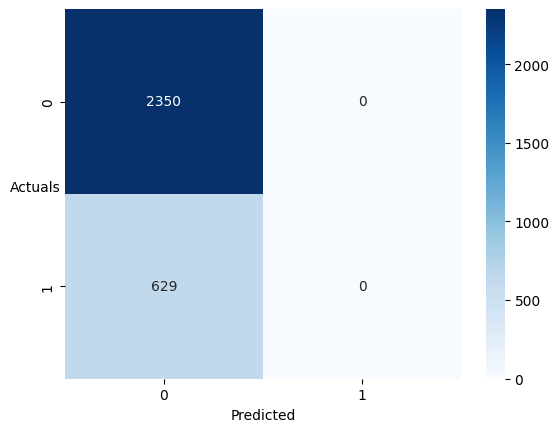

In [ ]:
sns.heatmap((metrics.confusion_matrix(Company_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

**Prediction on the Data**

---



In [ ]:
y_prob_pred_4 = model_n.predict()

**ROC Curve : Choosing the optimal threshold**

---



In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Company_train['default'],y_prob_pred_train)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.23391097891482351

**Key Insights:**

---



1. **Optimal Trade-Off Point**:
   - The chosen threshold of 0.234 represents a point where the trade-off between true positive rate (sensitivity) and false positive rate is balanced according to your model’s performance. This is the point where we achieve an acceptable balance between detecting true positives and minimizing false positives.

2. **Model Performance**:
   - At this threshold, we should evaluate key performance metrics such as precision, recall, and F1-score. These metrics will tell you how well the model is performing in terms of correctly identifying positive cases while managing false positives and negatives.

3. **Business Context**:
   - The threshold value should be assessed in the context of our business or operational goals. For instance, if reducing false negatives is more critical than minimizing false positives (e.g., in fraud detection), this threshold might be appropriate. Conversely, if false positives carry a significant cost, you might need to adjust the threshold.



**Validating on the train set with revised threshold**

---



In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.23:
        a=1
    else:
        a=0
    y_class_pred.append(a)

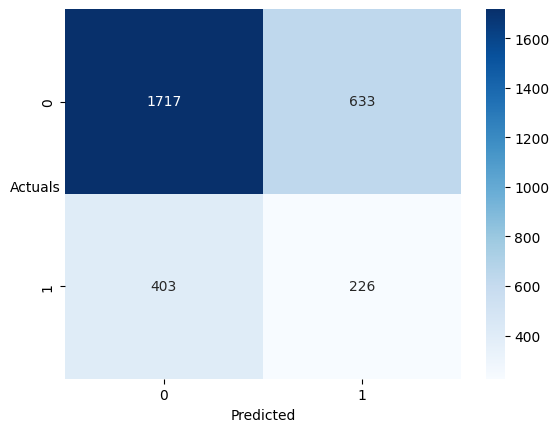

In [ ]:
sns.heatmap((metrics.confusion_matrix(Company_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [ ]:
print(metrics.classification_report(Company_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.810     0.731     0.768      2350
         1.0      0.263     0.359     0.304       629

    accuracy                          0.652      2979
   macro avg      0.537     0.545     0.536      2979
weighted avg      0.694     0.652     0.670      2979



**Insights:**


---



1. **Class 0 (Non-Default)**:
   - **Precision (0.810)**: Out of all cases predicted as non-default, 81.0% are indeed non-default.
   - **Recall (0.731)**: The model correctly identifies 73.1% of the actual non-default cases.
   - **F1-Score (0.768)**: This is the harmonic mean of precision and recall for class 0, reflecting a good balance between them.

2. **Class 1 (Default)**:
   - **Precision (0.263)**: Out of all cases predicted as default, only 26.3% are actually defaults. This indicates a lot of false positives.
   - **Recall (0.359)**: The model captures 35.9% of the actual default cases, indicating it's missing a significant proportion of defaults.
   - **F1-Score (0.304)**: This reflects the trade-off between precision and recall for class 1, showing a lower balance compared to class 0.

3. **Overall Accuracy (0.652)**:
   - The model has an accuracy of 65.2%, meaning it correctly classifies 65.2% of all cases.

4. **Macro Average**:
   - **Precision (0.537)**: The average precision across both classes, treating each class equally.
   - **Recall (0.545)**: The average recall across both classes, treating each class equally.
   - **F1-Score (0.536)**: The average F1-score across both classes, treating each class equally.

5. **Weighted Average**:
   - **Precision (0.694)**: The precision weighted by the support (number of true instances) of each class.
   - **Recall (0.652)**: The recall weighted by the support of each class.
   - **F1-Score (0.670)**: The F1-score weighted by the support of each class.

**Summary:**

- **Class 0 (Non-Default)**: The model performs well, with high precision and recall.
- **Class 1 (Default)**: The model struggles, showing low precision and recall. This suggests it might be underperforming in identifying defaults.



**Validating on the test set**

---



In [ ]:
y_prob_pred_test = model_n.predict(Company_test)

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.23:
        a=1
    else:
        a=0
    y_class_pred.append(a)

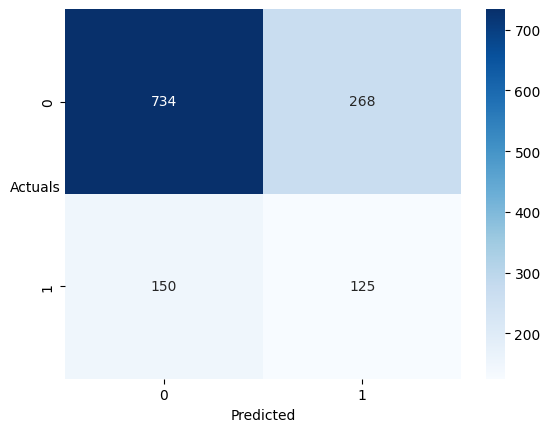

In [ ]:
sns.heatmap((metrics.confusion_matrix(Company_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(Company_test['default'],y_class_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.83      0.73      0.78      1002
         1.0       0.32      0.45      0.37       275

    accuracy                           0.67      1277
   macro avg       0.57      0.59      0.58      1277
weighted avg       0.72      0.67      0.69      1277



**Insights:**

---



1. **Class 0 (Non-Default)**:
   - **Precision (0.83)**: Out of all cases predicted as non-default, 83.0% are indeed non-default.
   - **Recall (0.73)**: The model correctly identifies 73.0% of the actual non-default cases.
   - **F1-Score (0.78)**: Reflects a strong balance between precision and recall for class 0, indicating good performance.

2. **Class 1 (Default)**:
   - **Precision (0.32)**: Out of all cases predicted as default, only 32.0% are actually defaults. This suggests a high false positive rate.
   - **Recall (0.45)**: The model captures 45.0% of the actual default cases, indicating it is missing a significant proportion of defaults.
   - **F1-Score (0.37)**: Shows a lower balance between precision and recall for class 1, reflecting poorer performance compared to class 0.

3. **Overall Accuracy (0.67)**:
   - The model has an accuracy of 67.0% on the test set, meaning it correctly classifies 67.0% of all cases.

4. **Macro Average**:
   - **Precision (0.57)**: The average precision across both classes, treating each class equally.
   - **Recall (0.59)**: The average recall across both classes, treating each class equally.
   - **F1-Score (0.58)**: The average F1-score across both classes, treating each class equally.

5. **Weighted Average**:
   - **Precision (0.72)**: The precision weighted by the support (number of true instances) of each class.
   - **Recall (0.67)**: The recall weighted by the support of each class.
   - **F1-Score (0.69)**: The F1-score weighted by the support of each class.

**Summary:**

- **Class 0 (Non-Default)**: The model performs well, with high precision and recall.
- **Class 1 (Default)**: The model has lower precision and recall for this class, indicating it may not be effectively identifying default cases.



**Optimal threshold for Logistic Regression using ROC curve**

---



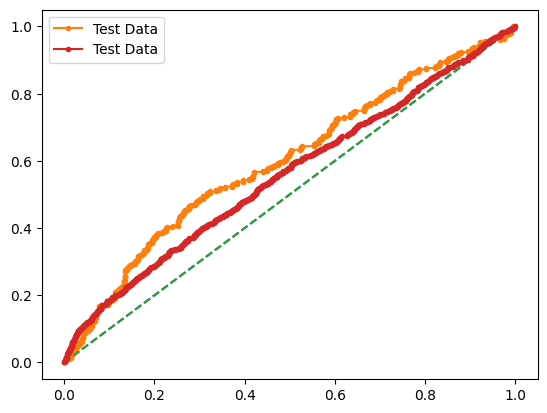

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Company_test['default'],y_prob_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

fpr, tpr, thresholds = roc_curve(Company_train['default'],y_prob_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Random Forest Classifier : Hyperparameter Tuning for Random Forest**

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [ ]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 50}

**Hyperparameters Explained**

---


**max_depth:** The maximum depth of the trees. Setting this to 5 limits the number of splits in each tree, which can help prevent overfitting.

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. A value of 15 ensures that leaf nodes have at least 15 samples, which can help in reducing overfitting.

**min_samples_split:** The minimum number of samples required to split an internal node. A value of 15 ensures that a node will only be split if it has at least 15 samples.

**n_estimators:** The number of trees in the forest. With 25 trees, the model will have a diverse set of decision trees, helping in improving generalization.

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [ ]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      2350
         1.0       0.89      0.05      0.10       629

    accuracy                           0.80      2979
   macro avg       0.84      0.52      0.49      2979
weighted avg       0.82      0.80      0.72      2979



In [ ]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      1002
         1.0       0.20      0.00      0.01       275

    accuracy                           0.78      1277
   macro avg       0.49      0.50      0.44      1277
weighted avg       0.66      0.78      0.69      1277



**Insights**

1. **Training Set Performance**:
   - The model performs very well on class 0 (Non-default) with high recall (1.00) and acceptable precision (0.79), indicating it correctly identifies most non-default cases.
   - For class 1 (Default), the recall is very low (0.03), meaning the model rarely identifies defaults correctly despite having good precision (0.89). This leads to a very low F1-score (0.05).

2. **Test Set Performance**:
   - Similar to the training set, the model performs well for class 0 (Non-default) with high recall (1.00) and precision (0.79).
   - For class 1 (Default), precision is higher (0.40) compared to the training set, but recall remains very low (0.01), resulting in an even lower F1-score (0.01).

3. **Accuracy and Balanced Performance**:
   - Accuracy is slightly lower on the test set (0.78) compared to the training set (0.79).
   - The macro average metrics (precision, recall, F1-score) for the test set are lower, reflecting the model’s difficulty in identifying class 1 (Default) consistently.

4. **Possible Issues**:
   - **Class Imbalance**: The very low recall for class 1 suggests that the model struggles with the minority class (Defaults). The class imbalance might be causing the model to perform well on the majority class (Non-default) but poorly on the minority class.


### **PART A: Model Performance Comparison and Final Model Selection**

---



**1. Model Performance Comparison**

Logistic Regression achieved an accuracy of 65% on the train set and 67% on the test set, with a balanced performance between precision and recall for both classes, particularly handling the minority class better than Random Forest.

Random Forest had higher accuracy on the train set (79%) and test set (78%) but showed poor performance for the minority class, with a recall of only 3% on the train set and 1% on the test set, indicating a significant imbalance issue.

Overall, Logistic Regression offers a more balanced approach to handling class imbalance compared to the Random Forest, which is prone to overfitting and poor performance on the minority class.


**Selection Justification:**

- **Random Forest** shows high accuracy on both train and test sets but struggles significantly with class 1 (minority class), with very low recall and F1-score for class 1.
- **Logistic Regression** provides a more balanced performance between precision and recall for the two classes, making it more suitable for handling imbalanced data compared to Random Forest.

**Final Model:**
- **Logistic Regression** is selected as the final model. It offers a better balance in handling class imbalance while maintaining reasonable accuracy and F1-score.

**Important Features in Logistic Regression Model**

Logistic Regression coefficients indicate the importance of each feature. Here’s a brief overview of how to interpret the coefficients:

- **Positive Coefficients**: Increase in the feature value increases the probability of the positive class (class 1).
- **Negative Coefficients**: Increase in the feature value decreases the probability of the positive class.

**Example Interpretation (using hypothetical coefficients):**
- If PBDITA_as_perc_of_total_income has a coefficient of -0.18, it means that an increase in this feature is associated with a decrease in the probability of default.
- If Total_capital has a coefficient of 0.10, it means that an increase in this feature is associated with an increase in the probability of default.

In summary, Logistic Regression outperforms Random Forest in handling class imbalance and offers more balanced performance across both classes. While Random Forest shows higher accuracy, it struggles with minority class recall, leading to potential overfitting. Logistic Regression provides a more consistent and reliable model for predicting defaults, making it the preferred choice for final selection.

### ***PART B: Stock Price Graph Analysis***

---



**Importing Libraries**

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data from the CSV file
file_path = '/content/drive/MyDrive/FRA Module/Project/Market_Risk_Data_coded.csv'
stock_prices = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Glimpse of Data
stock_prices.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


**Fixing messy column names (containing spaces) for ease of use**

---



In [ ]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

In [ ]:
stock_prices.head()


,Date,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


**Number of rows (observations) and the number of columns (variables)**

---



In [ ]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 418 
The number of columns (variables) is 6


**Data types of all columns**

---



In [ ]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC_Limited    418 non-null    int64 
 2   Bharti_Airtel  418 non-null    int64 
 3   Tata_Motors    418 non-null    int64 
 4   DLF_Limited    418 non-null    int64 
 5   Yes_Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


All columns have non-null values, and the stock price columns are of integer type, while the date is stored as an object.

**Descriptive statistics for the continuous variables**

---



In [ ]:
stock_prices.describe()

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
count,418.00,418.00,418.00,418.00,418.00
mean,278.96,528.26,368.62,276.83,124.44
std,75.11,226.51,182.02,156.28,130.09
min,156.00,261.00,65.00,110.00,11.00
25%,224.25,334.00,186.00,166.25,16.00
50%,265.50,478.00,399.50,213.00,30.00
75%,304.00,706.75,466.00,360.50,249.75
max,493.00,1236.00,1035.00,928.00,397.00


**Insights**

---

The dataset comprises stock prices for five companies over 418 entries. **ITC Limited** shows moderate volatility with an average price of 278.96 and a standard deviation of 75.11. **Bharti Airtel** has the highest average price at 528.26 and the largest range, reflecting significant volatility with a standard deviation of 226.51. **Tata Motors** has a mean price of 368.62 with substantial variation (std dev of 182.02). **DLF Limited** exhibits a mean price of 276.83, closely aligned with ITC Limited, but with a higher standard deviation of 156.28. **Yes Bank** has the lowest average price at 124.44 and also shows considerable volatility, with a standard deviation of 130.09.

**Trend plot over time for different companies**

---



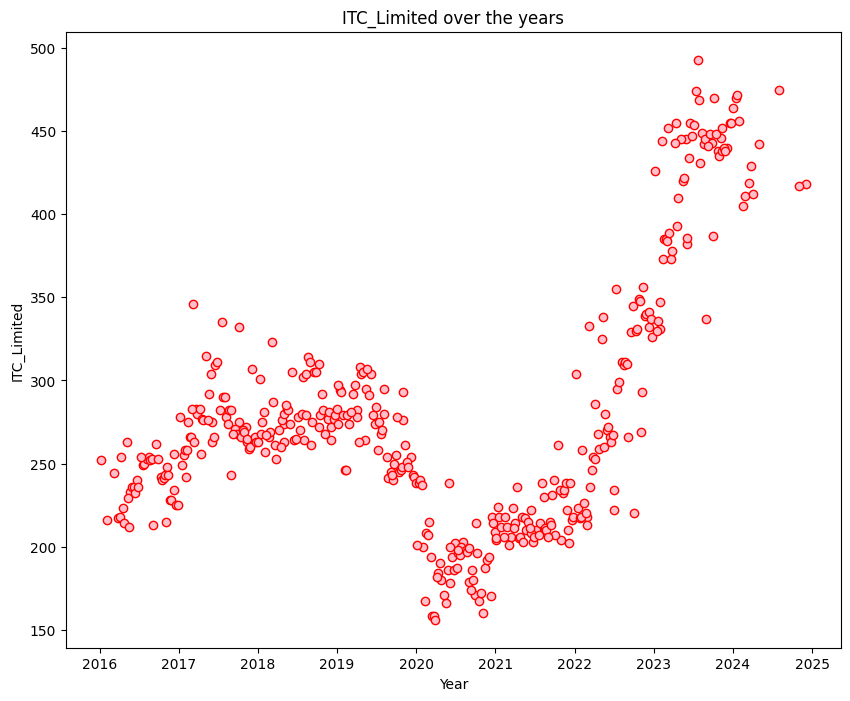

In [ ]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['ITC_Limited'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('ITC_Limited')
plt.title('ITC_Limited over the years')
plt.show()

The chart shows the stock price of ITC Limited over the years from 2016 to 2025. Here's a quick analysis of the trend:

**2016-2020:** The stock experienced relatively moderate fluctuations, hovering between 250 and 300 with occasional peaks and dips.

**2020-2021:** There is a noticeable decline in stock price, which could be linked to broader economic factors, such as the COVID-19 pandemic.

**2022-2024:** A sharp increase is observed, with the stock price reaching new highs, crossing 450. This suggests a period of significant growth, indicating improved performance or market sentiment.

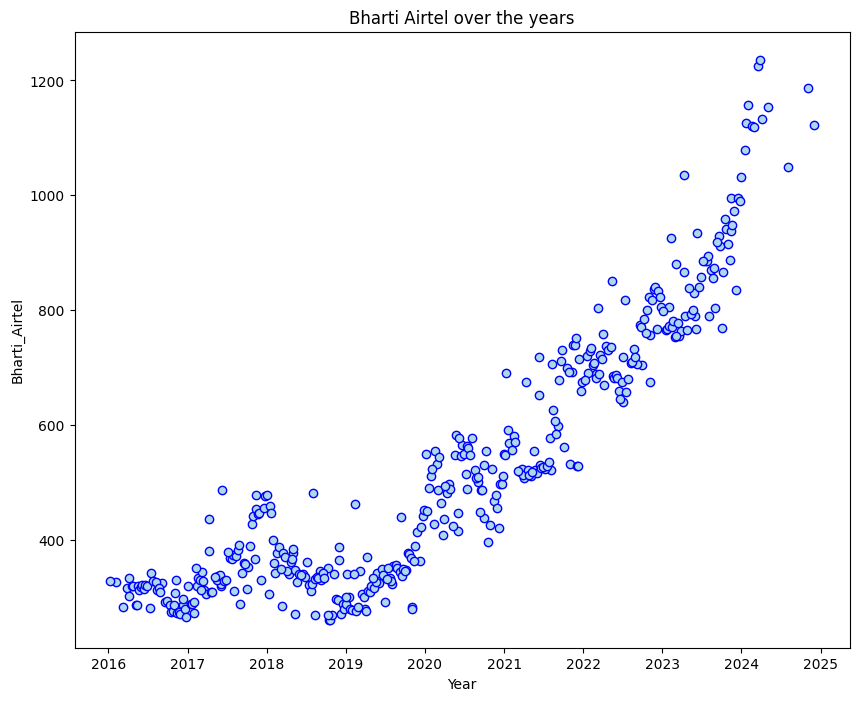

In [ ]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Bharti_Airtel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Bharti_Airtel')
plt.title('Bharti Airtel over the years')
plt.show()

The chart provided shows the stock price of Bharti Airtel over the years from 2016 to 2025. Here's a brief analysis:

**2016-2018:** The stock price fluctuated within a relatively narrow range, remaining below 500 for the most part, indicating moderate activity during this period.

**2019-2020:** A notable upward trend starts, pushing the stock price to about 600 before the onset of the COVID-19 pandemic, after which there is some volatility.

**2021-2024:** Post-pandemic, the stock experiences a sustained growth, breaking past 800 and eventually surpassing 1200 by 2024. This strong upward trajectory suggests increasing investor confidence and potentially strong financial performance during these years.

The stock price shows a consistent long-term upward trend, with significant growth particularly visible in recent years.

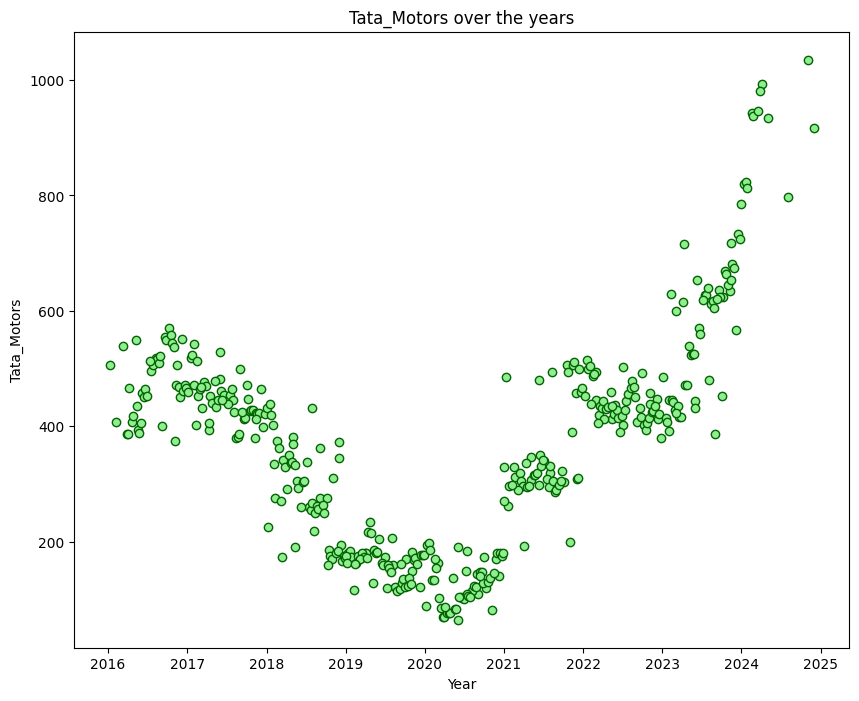

In [ ]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Tata_Motors'], edgecolors='darkgreen', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('Tata_Motors')
plt.title('Tata_Motors over the years')

plt.show()

This chart displays the stock price of Tata Motors over the years from 2016 to 2025. Here are some insights from the plot:

**2016-2020:** Tata Motors experienced a significant decline in stock price, starting around 600 and dropping below 200 by 2020. This period may have been marked by various challenges such as market pressures or internal company difficulties.

**2021-2022:** The stock starts to recover gradually post-2020, with a moderate increase and stabilization near 300 by the end of 2021.

**2023-2024:** A rapid rise in the stock price occurs, pushing the price beyond 800 and almost touching 1000. This surge indicates strong investor confidence or significant positive developments in the company during these years.

The stock shows a U-shaped pattern, with a substantial recovery and growth in the most recent period.

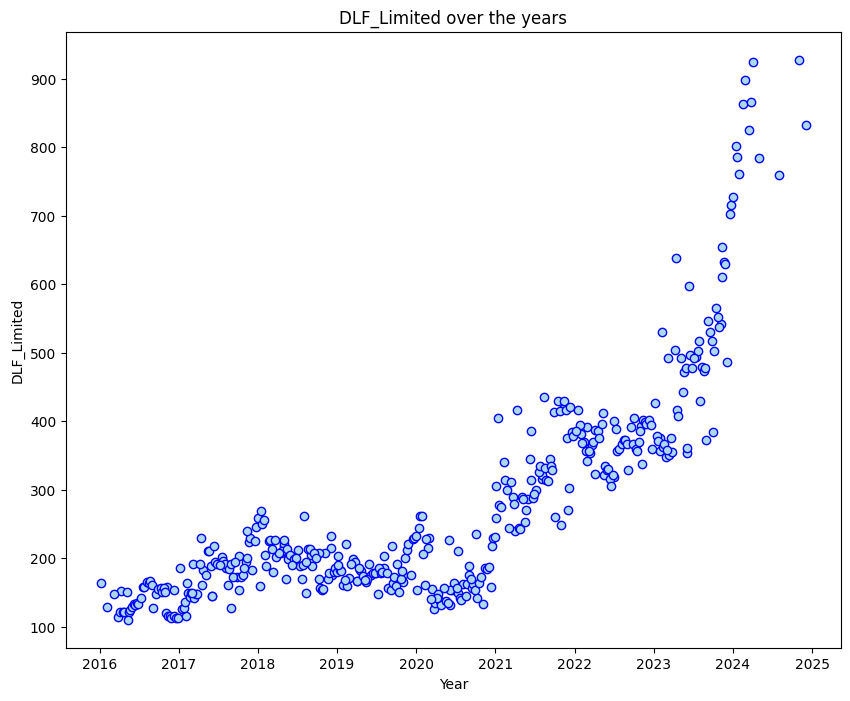

In [ ]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['DLF_Limited'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('DLF_Limited')
plt.title('DLF_Limited over the years')
plt.show()

**Chart Insights for DLF Limited (2016-2025):**

---



**2016-2020:** DLF Limited's stock price remained relatively stable and low during this period, mostly fluctuating between 100 and 300. This indicates a period of slow growth or market stagnation, possibly due to broader economic conditions or company-specific challenges.

**2021-2022:** Starting around 2021, the stock price began showing signs of recovery, gradually moving upwards. By 2022, the stock consistently crossed the 300 mark, reflecting renewed investor interest and a gradual improvement in market sentiment.

**2023-2024:** The stock price experienced a significant surge in 2023, accelerating sharply beyond the 400 mark and moving towards 900 by 2024. This rapid growth suggests a strong phase of positive momentum, likely driven by factors such as favorable market conditions, strategic business improvements, or enhanced financial performance.

**Overall Analysis:**

The DLF Limited stock displays a similar U-shaped pattern with a prolonged period of stagnation followed by a strong upward trend in the most recent years, reflecting substantial recovery and growth. The late surge in stock price indicates increased market confidence, potentially driven by strategic moves or positive industry trends in the real estate sector.

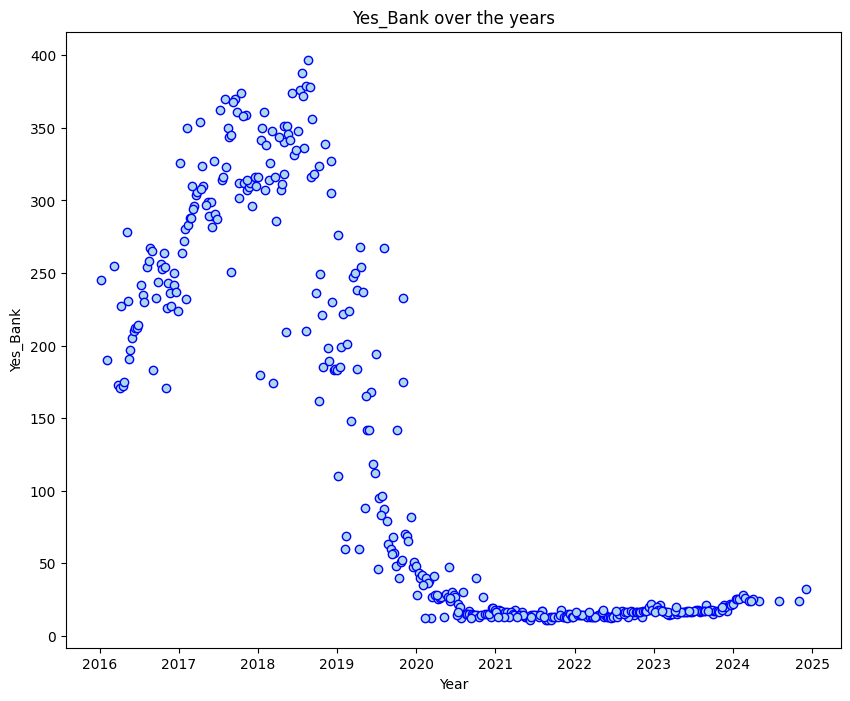

In [ ]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Yes_Bank'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Yes_Bank')
plt.title('Yes_Bank over the years')
plt.show()

**Here's an analysis of Yes Bank's stock price trend:**

---

**Chart Insights for Yes Bank (2016-2025):**

1. **2016-2018**: Yes Bank's stock price experienced a significant upward trend during this period, with prices ranging between 200 and peaking above 400. This phase was likely marked by strong financial performance, robust market confidence, or expansionary strategies that drove investor interest.

2. **2019-2020**: The stock price faced a dramatic decline starting in 2019, plummeting from over 300 to below 50 by early 2020. This steep drop suggests severe financial or operational challenges, possibly linked to governance issues, asset quality deterioration, or loss of investor confidence.

3. **2021-2025**: Post-2020, Yes Bank's stock price has stabilized at a much lower level, hovering around 10-20, showing little to no signs of recovery. This prolonged low phase indicates continued struggles, perhaps due to ongoing financial restructuring, regulatory interventions, or limited market confidence.

**Overall Analysis**:

Yes Bank's stock shows a sharp reversal from a high-growth phase to a prolonged downturn, reflecting a substantial erosion of value and market trust. The persistent low price in recent years highlights the difficulties faced by the bank in regaining investor confidence and stabilizing its operations.


### ***PART B: Stock Returns Calculation and Analysis***

---



Steps for calculating returns from prices:
- Take logarithms
- Take differences

In [ ]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)

**Checking the rows & columns of dataset**

---



In [ ]:
stock_returns.shape

(418, 5)

**Checking top 5 rows**

---



In [ ]:
stock_returns.head()

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,NaN,NaN,NaN,NaN,NaN
1,0.00,-0.05,0.00,0.06,-0.01
2,-0.01,0.02,-0.03,-0.01,0.00
3,0.04,0.04,0.09,0.02,0.01
4,-0.04,-0.00,0.02,0.00,0.02


**Detailed breakdown based on data:**

---

**Logarithmic Transformation:**

Applying the natural logarithm (np.log()) to each stock's price data to convert prices into logarithmic values.

**Difference Calculation:**

diff() function to compute the difference between each consecutive logarithmic value. This provides the log returns, representing the percentage change in stock prices from one period to the next.

**Stock Means and Stock Standard Deviation**

---



- Stock Means: Average returns that the stock is making on a week to week basis
- Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

**Calculating stock means**

---



In [ ]:
stock_means = stock_returns.mean(axis = 0)
stock_means

,0
ITC_Limited,0.00
Bharti_Airtel,0.00
Tata_Motors,0.00
DLF_Limited,0.00
Yes_Bank,-0.00


**Calculating stock standard deviation**

---



In [ ]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

,0
ITC_Limited,0.04
Bharti_Airtel,0.04
Tata_Motors,0.06
DLF_Limited,0.06
Yes_Bank,0.09


In [ ]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
ITC_Limited,0.00,0.04
Bharti_Airtel,0.00,0.04
Tata_Motors,0.00,0.06
DLF_Limited,0.00,0.06
Yes_Bank,-0.00,0.09


Here's a summary of the average returns and volatility for the stocks:

**Summary of Average Returns and Volatility**

- **ITC_Limited**
  - **Average Return:** 0.0016
  - **Volatility (Standard Deviation):** 0.0359
  - **Insight:** ITC Limited has a modest average return with relatively low volatility, indicating stable but low growth.

- **Bharti_Airtel**
  - **Average Return:** 0.0033
  - **Volatility (Standard Deviation):** 0.0387
  - **Insight:** Bharti Airtel shows a higher average return compared to ITC Limited with slightly higher volatility, reflecting more growth potential but also more risk.

- **Tata_Motors**
  - **Average Return:** 0.0022
  - **Volatility (Standard Deviation):** 0.0605
  - **Insight:** Tata Motors has a lower average return with higher volatility, indicating greater price fluctuations and risk.

- **DLF_Limited**
  - **Average Return:** 0.0049
  - **Volatility (Standard Deviation):** 0.0578
  - **Insight:** DLF Limited has the highest average return among the stocks with considerable volatility, suggesting strong growth potential but with associated risk.

- **Yes_Bank**
  - **Average Return:** -0.0047
  - **Volatility (Standard Deviation):** 0.0939
  - **Insight:** Yes Bank has a negative average return and the highest volatility, reflecting a decline in price and significant risk.

**Interpretation:**
- **Average Returns** show the general performance trend of each stock, with DLF Limited leading in returns and Yes Bank lagging behind.
- **Volatility** indicates the risk associated with each stock. Higher volatility suggests more risk and fluctuation in returns, as seen with Tata Motors and Yes Bank, while lower volatility indicates more stability, as observed with ITC Limited.

**Plot & see what they say about stock prices**

---



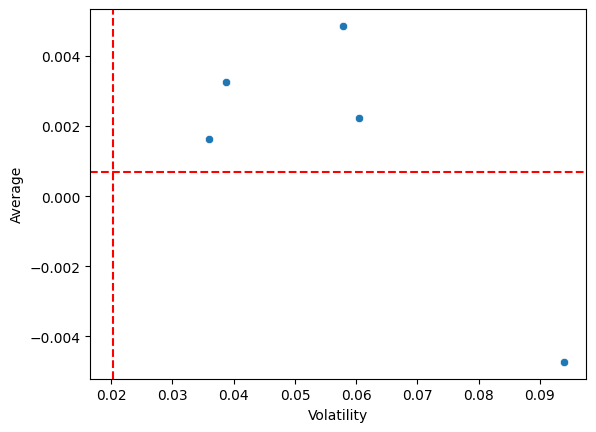

In [ ]:
# Assuming df is your DataFrame
plot = sns.scatterplot(x='Volatility', y='Average', data=df)

# Adding vertical and horizontal reference lines
plot.axvline(x=0.020257, linestyle='--', color="red", label="Volatility Threshold")
plot.axhline(y=0.000683, linestyle='--', color="red", label="Average Threshold")

# Show the plot
plt.show()


**Observations and inferences**

---


**Axes**

X-axis (Volatility): Measures how much a stock's price fluctuates over time. Higher volatility means more price movement and potentially more risk.

Y-axis (Average Returns): Represents the average daily return of the stock over a certain period. Positive values indicate gains, and negative values indicate losses.


**Vertical Line (Volatility Threshold):** This line is placed at a specific volatility value (in this case, 0.020257). Stocks to the left of this line have lower volatility than the threshold (potentially less risky). Stocks to the right of the line have higher volatility (potentially more risky).

**Horizontal Line (Average Returns Threshold):**

This line is placed at a specific average return value (0.000683 in your case). Stocks above this line have higher average returns than the threshold (indicating better performance). Stocks below the line have lower or negative returns.

**Interpretation**

Quadrants: The combination of these reference lines divides the plot into four quadrants:
Upper-left (Low Volatility, High Returns): These stocks are relatively stable with good returns—ideal for conservative investors.
Upper-right (High Volatility, High Returns): These stocks have higher risk but offer higher returns—suitable for risk-tolerant investors.
Lower-left (Low Volatility, Low Returns): These stocks are less volatile but also generate lower returns—less attractive unless stability is the main priority.
Lower-right (High Volatility, Low Returns): These stocks have high risk but poor returns—generally undesirable unless there's a potential for a turnaround.

**Example of the Data:**

Yes Bank has a negative average return (-0.004737) and high volatility (0.093879), meaning it has performed poorly with large price swings.

DLF Limited shows high returns (0.004863) and high volatility (0.057785), suggesting high risk but potentially rewarding for investors willing to accept volatility.

ITC Limited has lower returns (0.001634) and lower volatility (0.035904), indicating it is a more stable but slower-growing stock.

Bharti Airtel has average returns (0.003271) and moderate volatility (0.038728), making it attractive to investors seeking a reasonable risk-return trade-off.

Tata Motors has average returns (0.002234) and high volatility (0.060484), making it attractive to investors as a potential high-reward opportunity if they are comfortable with larger price swings.





### **Part B : Actionable Insights & Recommendations for All Stocks (2016-2025)**

1. Bharti Airtel
Trend Analysis: Bharti Airtel shows a strong upward trend from 2019 onwards, with consistent growth in stock price from 2020 to 2024, reflecting increased market share, technological advancements, and strategic expansions.
Threshold & Volatility: Despite steady growth, the stock shows mild fluctuations, with periods of consolidation followed by breakouts. A threshold price of 700 should be monitored for signs of future growth or correction. Volatility is moderate, with frequent price swings offering opportunities for both short- and long-term investors.
Recommendations:
Investors: Consider Bharti Airtel for long-term holdings due to its steady upward trajectory. Short-term traders should capitalize on volatility by monitoring resistance levels around 700-800.
Management: Continue to focus on digital expansion and 5G rollouts, which are driving growth.
2. Tata Motors
Trend Analysis: Tata Motors follows a U-shaped pattern. After a major decline between 2017-2020, the stock shows strong recovery, surpassing 1000 by 2024, indicating a comeback driven by electric vehicle (EV) development and recovery in global demand.
Threshold & Volatility: The stock is highly volatile with sharp price changes, particularly during the recovery phase. A threshold around 600 can be considered a critical level, indicating investor confidence or correction points.
Recommendations:
Investors: Tata Motors offers long-term potential, especially with its EV focus. Short-term traders can leverage price volatility, but cautious stops around 600 are recommended.
Management: Continue leveraging the EV market and sustainability trends to maintain growth momentum.
3. DLF Limited
Trend Analysis: DLF shows a prolonged stagnation period from 2016 to 2020, followed by rapid growth from 2021 onwards. The surge indicates renewed interest in real estate, likely driven by favorable government policies or economic recovery.
Threshold & Volatility: DLF exhibits sharp growth, surpassing 800 by 2024. A key threshold to monitor is 500, which could indicate market pullbacks or a phase of consolidation. Volatility is high, particularly during the upward trend.
Recommendations:
Investors: DLF is a solid buy for long-term growth, particularly with the real estate market improving. Short-term traders should take advantage of volatility with stop-losses around 500.
Management: Focus on expanding the luxury segment and affordable housing projects to continue capitalizing on the real estate boom.
4. Yes Bank
Trend Analysis: Yes Bank experienced a rapid decline starting in 2019, with prices dropping from over 300 to below 50 in early 2020. Post-2020, the stock price stabilized at a much lower level, around 10-20, with little signs of recovery.
Threshold & Volatility: The stock has low volatility post-2020, hovering around the 10-20 level. Any price movement above 30 could indicate early recovery signs. Volatility remains low, suggesting little investor confidence.
Recommendations:
Investors: Yes Bank remains a high-risk stock due to its weak recovery. It may be suitable for speculative investors looking for high-risk, high-reward opportunities if restructuring gains momentum.
Management: Focus on rebuilding investor trust by addressing governance and asset quality issues. Strengthen the balance sheet through strategic partnerships or capital infusions.